# Probability and Statistics

In [2]:
# PACKAGES
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import statistics as st
import pandas as pd

# SEABORN THEME
scale = 0.4
W = 16*scale
H = 9*scale
sns.set(rc = {'figure.figsize':(W,H)})
sns.set_style("white")

Main References:
- A great source to learn probability and Statistics with Python [is this website](https://ethanweed.github.io/pythonbook/landingpage.html) by Weed ands Navarro (translation of Navarro’s book [Learning Statistics with R](https://learningstatisticswithr.com/) in Python). For this Notebook, we borrow from Weed and Navarro's chapters on Statistical Theory. 
- For more theory in statistics and econometrics, we rely on
    - J. Wooldridge, Econometric Analysis of Cross Section and Panel Data, MIT Press, 2002
    - William H. Greene, Econometric Analysis, sixth edition, Pearson.

## Content
- [Concepts of Probability and Statistics](#Concepts-of-Probability-and-Statistics)
    - [Random Variables and Probability Distributions](#Random-Variables-and-Probability-Distributions)
    - [Discrete Random Variables and Mass Functions](#Discrete-Random-Variables-and-Mass-Functions)
    - [Continuous Random Variables and Density Functions](#Continuous-Random-Variables-and-Density-Functions)
    - [Moments of Density Functions](#Moments-of-Density-Functions)
    - [The Univariate Normal Distribution](#The-Univariate-Normal-Distribution)
    - [The Normal Distribution in Python](#The-Normal-Distribution-in-Python)
    - [Population and Random Samples](#Population-and-Random-Samples)
    - [Estimators](#Estimators)
    - [Confidence Intervals](#Confidence-Intervals)
    - [Hypothesis Testing](#Hypothesis-Testing)

## Concepts of Probability and Statistics

### Random Variables and Probability Distributions
- A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon, described by a probability distribution (for a more formal definition, see the [Wikipedia, Random variable](https://en.wikipedia.org/wiki/Random_variable)).
- In probability theory and statistics, a **probability distribution** is the mathematical function that gives the probabilities of occurrence of different possible outcomes ([Wikipedia, Probability distribution](https://en.wikipedia.org/wiki/Probability_distribution)).
- Note on notation: usually, a random variable is denoted by a capital letter, i.e. $X$ and its numerical outcomes, or realizations, by a lowercase letter, i.e. $x$. This is the notation we'll try to use as much as possible in what follows.

### Discrete Random Variables and Mass Functions
- If the range of the random variable is countable, the random variable is called a **discrete random variable** and its distribution is a discrete probability distribution, i.e. can be described by a probability mass function that assigns a probability to each value in the range of the random variable ([Wikipedia, Random variable](https://en.wikipedia.org/wiki/Random_variable))
- The **probability mass function** (PMF) can be represented like this:

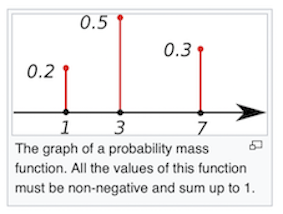

<center>Source: Wikipedia, Probability Mass Function</center>

- It's formal definition is a function f : R -> [0,1] defined by:

<br>
$$
f(x)=P(X=x)
$$
<br>

for $-\infty < 0 < \infty$, where P is a probability measure. The probabilities associated with all (hypothetical) values must be non-negative and sum up to 1 ([Wikipedia, Probability Mass Function](https://en.wikipedia.org/wiki/Probability_mass_function)).

- Example: **Bernoulli Distribution**
    - You should always go on Wikipedia and check the page for the distribution, here is the one for the [Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)
    - PMF: 
      $
      f(x;p) =
      \begin{cases}
        p     & \text{if $x = 1$}, \\
        1 - p & \text{if $x = 0$}.
      \end{cases}
      $
    - Representation of PMF for different p:
    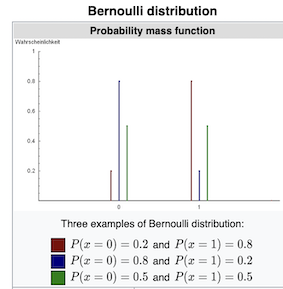
    <center>Source: Wikipedia, Bernoulli Distribution</center>
    - A fair coin toss follows a Bernoulli with p = 0.5. 
    - Note that the Bernoulli Distribution is just a special case of a **Discrete Binomial Distribution** with one repetition. You should go check the Wikipedia page of a [Discrete Binomial Distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution). For example, the Binomial Distribution tells you what is the probability of getting heads if we flip a coin n times, or what is the probability of getting 6 if we roll a dice 3 times.
    - For the sake of time, here we do not simulate these distributions. You can check [this article by DataCamp](https://www.datacamp.com/tutorial/probability-distributions-python) and the chapter [Introduction to Probability](https://ethanweed.github.io/pythonbook/04.02-probability.html#) by Ethan Weed to see how to simulate a Bernoulli and a Discrete Binomial in Python.

### Continuous Random Variables and Density Functions
- If the range of the random variable is uncountably infinite (usually an interval) then the random variable is called a **continuous random variable**. 
- **Example**: suppose bacteria of a certain species typically live 4 to 6 hours. The probability that a bacterium lives exactly 5 hours is equal to zero. A lot of bacteria live for approximately 5 hours, but there is no chance that any given bacterium dies at exactly 5.00 hours. However, the probability that the bacterium dies between 5 hours and 5.01 hours is quantifiable ([Wikipedia, Probability density function](https://en.wikipedia.org/wiki/Probability_density_function)).
- The probability distribution of a continuous random variable can be described by a **probability density function** (PDF), which assigns probabilities to intervals. In particular, **each individual point must necessarily have probability zero for a (absolutely) continuous random variable** ([Wikipedia, Random Variable](https://en.wikipedia.org/wiki/Random_variable)).
- More formally, the density function $f(x)$ of a continuous random variable $X$ is the non-negative (Lebesgue-integrable) function that satisfies the following condition:
    - $P(a<X<b)=\int_a^bf(x)dx$

### Moments of Density Functions
- The shape of density functions depends on quantitative measures that are called **"moments"**. In mathematics, the moments of a function are quantitative measures related to the shape of the function's graph. If the function is a probability distribution, then the first moment is the expected value, the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis ([Wikipedia, Moments](https://en.wikipedia.org/wiki/Moment_(mathematics))).
- The general formula for the **n-th moment** of a real-valued continuous function f(x) of a real variable about a value c is the following:
<br>
<br>
$$\mu_n=\int_{-\infty}^{+\infty}(x-c)^nf(x)dx$$
<br>
- The value c is the previous moment on which the moment in question depends. For the expected value, which is the first moment, we'll have $c=0$, as the mean does not depend on any previous moment. For the variance, which is the second moment, we'll have $c=\mu$.
- Let's define the **expected value**, i.e. the first moment. Intuitively, the expected value of a discrete random variable is a weighted average of all possible outcomes, where the weights are the probabilities that these outcomes materialize (given by the probability mass function). In the case of a continuum random variable, the expectation is defined by integration ([Wikipedia, Expected Value](https://en.wikipedia.org/wiki/Expected_value#Random_variables_with_density)). The notation of the expected value for a random variable $X$ is $E(X)$. The general formula for a continuous random variable is:
<br>
<br>
$$E[X]=\int_{-\infty}^{\infty}xf(x)dx$$
<br>
- For the properties of the expected value, i.e. non-negativity, linearity of expectations, monotonicity, etc, you can check the page [Wikipedia, Expected Value - Properties](https://en.wikipedia.org/wiki/Expected_value#Properties).
- Let's now define the **variance**, i.e. second moment. The variance is the expectation of the squared deviation of a random variable from its first moment ([Wikipedia, Variance](https://en.wikipedia.org/wiki/Variance)). Intuitively, the variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value. The notation for the variance of a random variable $X$ is $V(X)$. The general formula for the variance of a continuous random variable is:
<br>
<br>
$$V[X]=\int_{-\infty}^{\infty}(x-E(X))^2f(x)dx$$
<br>
- Given it's definition, the variable can be re-written in terms of the expected value as follows:
<br>
<br>
$$V[X]=E[(X-E[X])^2]=E[X^2]-E[X]^2$$
<br>
- For the properties of the variance you can check the page [Wikipedia, Variance - Properties](https://en.wikipedia.org/wiki/Variance#Properties).
- Famous probability distributions of continuous random variables that are used often in statistics are the [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution), [Chi-squared Distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution), [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) and [F-distribution](https://en.wikipedia.org/wiki/F-distribution). All of them can be described by a PDF. In what follows we'll consider the **Normal Distribution**, its PDF and its moments.

### The Univariate Normal Distribution

- The **univariate normal distribution**, or more simply normal distribution, or Gaussian distribution, or Bell curve, is a type of continuous probability distribution for one real-valued random variable.
- Here we refer to the normal distribution as the univariate normal distribution. It is **univariate** because it refers to one random variable. If we had more random variables, we would have a joint, or multivariate, normal distribution (see later).
- As we have mentioned, a random variable is a variable whose possible values are numerical outcomes of a random phenomenon described by a probability distribution. Let's say that this probability distribution is a normal. This means that the probability that a random variable takes certain values is described by a normal distribution. A shorter way to say the same thing is to say **"the random variable is normally distributed"**, or "the random variable follows a normal distribution". 
- As usual, you should check the Wikipedia page of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), in which you can see the the density function and its parameters / moments.
- The probability density function (**PDF**) that describes the (univariate) normal probability distribution of a random variable is the following:
<br><br>
$$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)$$
<br>
- $x$ are the values that the random variable takes. You can see that the values of this function depend on the constant $\pi$ (fixed) and parameters $\mu$ and $\sigma$.
- We can apply the formula for the expected value to obtain its **expected value**:
<br><br>
$$E(X)=\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{+\infty}x\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)dx = \mu$$
<br>
- So the expected value of a normal density equals the parameter $\mu$. We can do the same for the second moment, i.e. the **variance**:
<br><br>
$$V(X)=\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{+\infty} (x-\mu)^2 \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)dx = \sigma^2$$
<br>
- So to **recap**, we start by the density function of a normally distributed variable $X$, and this function has some parameters $\mu$ and $\sigma^2$ inside. By applying formulas to this function for the moments, we can see that the expected value (first moment) is actually the parameter $\mu$, and the variance (second moment) is actually the parameter $\sigma^2$. So we can say that our random variable $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$, which in notation is written as $X \sim \mathcal{N}(\mu,\,\sigma^{2})$.
- A special case of the normal distribution is called **standard normal distribution**, with the following density function, moments and notation:
<br><br>
$$f(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)$$
<br>
$$E(X)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty}x\exp\left(-\frac{x^2}{2}\right)dx = 0$$
<br>
$$V(X)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} x^2 \exp\left(-\frac{x^2}{2}\right)dx = 1$$
<br>
$$X \sim \mathcal{N}(1,\,0)$$

### The Normal Distribution in Python
- Ok great! Let's now see what all of this "really" means with the help of Python. 
- To work with random variables and distributions in **Python**, we use a combination of our beloved packages `numpy` and `scipy`. To get the values $f(x)$ of the probability density function of a normal distribution with $\mu=0$ and $\sigma^2=1$ (standard normal distribution), we use some `numpy` functions and the function `stats.norm.pdf` from `scipy` (we imported scipy.stats as stats):

In [ ]:
# set mean, variance and standard deviation
mu = 0
variance = 1
sigma = np.sqrt(variance)

# get range of the PDF (3 standard deviations away from the mean)
pdf_range = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) 

# return densities of the PDF
pdf_dens = stats.norm.pdf(pdf_range, mu, sigma)
pdf_dens

To plot these values, i.e. to plot the PDF, let's use the `seaborn` package:

In [ ]:
# Plot, set labels, and remove top and right spines
fig = sns.lineplot(x = pdf_range, y = pdf_dens)
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')
sns.despine()

- As mentioned, the values of the function are as such that the area below the function in a given interval represents the probability that the random variable takes values within that interval. 
- **ONCE AGAIN (yeah one more time): the values of the density functions are not probabilities! The probability that a continous random variable takes a specific value is zero! The values of the density functions are values such that the underling area of the function equals the probability that the random variable take values in a specific interval**.
- In the case of the normal distribution, the probability that the random variable takes values in the interval of +/- one standard deviation from the mean is **68.3%**. Furthermore, the probability that the random variable takes values in the interval of +/- two standard deviations from the mean is **95.4%**.
- This is shown in the figures below:

In [ ]:
# set figure parameters
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# plot densities
sns.lineplot(x = pdf_range, y = pdf_dens, ax=axes[0])
sns.lineplot(x = pdf_range, y = pdf_dens, ax=axes[1])

# add shaded area
x_fill1 = np.arange(-1*sigma, 1*sigma, 0.001)
x_fill2 = np.arange(-2*sigma, 2*sigma, 0.001)
y_fill1 = stats.norm.pdf(x_fill1, mu , sigma)
y_fill2 = stats.norm.pdf(x_fill2, mu, sigma)
axes[0].fill_between(x_fill1, y_fill1, 0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2, y_fill2, 0, alpha=0.2, color='blue')

# add axis titles
axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")
axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

sns.despine()

- Finally, the probability that the random variable takes values in the interval of +/- three standard deviations from the mean is 99.7% (not shown). Note that **these thresholds always hold** for a normal distribution, regardless of the values of $\mu$ and $\sigma^2$.
- Indeed, the normal distribution can have different shapes, depending on the values we set for $\mu$ and $\sigma^2$. The **shape of the curves** above is as such because we have set the mean $\mu=0$ and the variance $\sigma^2=1$. If we change these parameters, the shape of this curve will change. For example, if we increase the variance $\sigma^2$ from 1 to 2, the curve will be "flatter", which means that the values that the random variable takes will be more spread, i.e. farer away from the mean ("fat tails"). 
- The figure below shows the density of the standard normal distribution done above with $\mu=0$ and $\sigma^2=1$ (blue) and the density of the normal distribution with $\mu=0$ and $\sigma^2=2$ (red).

In [ ]:
# get second curve
variance_2 = 2
sigma_2 = np.sqrt(variance_2)
pdf_range_2 = np.linspace(mu - 3*sigma_2, mu + 3*sigma_2, 100)
pdf_dens_2 = stats.norm.pdf(pdf_range_2, mu, sigma_2)

# plot densities
sns.lineplot(x = pdf_range, y = pdf_dens)
sns.lineplot(x = pdf_range_2, y = pdf_dens_2)

# add shaded area
x_fill1 = np.arange(-1, 1, 0.001)
x_fill2 = np.arange(-2, 2, 0.001)
y_fill1 = stats.norm.pdf(x_fill1, mu, sigma)
y_fill2 = stats.norm.pdf(x_fill2, mu, sigma_2)
plt.fill_between(x_fill1, y_fill1, 0, alpha=0.1, color="blue")
plt.fill_between(x_fill2, y_fill2, 0, alpha=0.2, color = "red")

# add axis titles
plt.title("Shaded Area = 68.3%")
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')
plt.xlim((mu - 3*sigma), (mu + 3*sigma))

sns.despine()

- The surface of the shaded areas of the two curves is the same, i.e. they refer to 68.3% of the values. Remember that this area, i.e. the integral between -1 and 1 for the first curve and -2 and 2 for the second curve, is the probability that the respective random variable takes values between, respectively, -1 and 1 and -2 and 2. 
- So, while for the first random variable, 68.3% of the values are condensed around the mean (which is 0), for the second random variable 68.3% of the values are more spread around the mean (which is again 0). This example shows that the shape of the density function, and therefore the probability distribution, depends on its variance. 
- In general, the shape of the normal density function depends on its **first two moments**, i.e. the mean and the variance. For an example of how a change in the mean changes the density (it's a shift in this case), see [Introduction to Probability](https://ethanweed.github.io/pythonbook/04.02-probability.html#fig-normal) by Weed and Navarro.

### Population and Random Samples
- Assume that you want to study the characteristics of the individuals of a population (individuals are not necessarily human beings, they can be firms, countries, sectors, ...). For instance, we want to study the weight of a population. **Sampling** is the only way to do so if the population is large, as observing the entire population is typically impossible.
- Statisticians operationalise the concept of a **“population”** in terms of mathematical objects that they know how to work with, i.e. probability distributions. So for the rest of this notebook and many others to come, as we are doing data science and statistics, a population will be a probability distribution.
- A **random sample** $\{X_1, ...X_n\}$ is a collection of random variables in which every member of the population has the same chance of being selected. These random variables follow the probability distribution of the population. Specifically, you can think of the realizations ($x_i$) of these random variables ($X_i$) as independent draws from the distribution of the population. For this reason, we say that these random variables are independent and identically distributed (i.i.d.). Weird right? Yeah, it'll become clearer in a moment when we do this with Python.
- In general you have access to only one realization of a random sample: a **sample** $\{x_1, ...x_n\}$. Our objective will be to draw conclusions about the entire population by relying only on this realization - in statistical language, we do *inference*.
- OK let's follow the Example by Weed and Navarro and say we’re talking about IQ scores. To a psychologist, the population of interest is a group of actual humans who have IQ scores. A statistician “simplifies” this by operationally defining the population as a probability distribution. IQ tests are designed so that the average IQ is 100, the standard deviation of IQ scores is 15, and the distribution of IQ scores is normal. These values are referred to as the population parameters because they are characteristics of the entire population. That is, we say that the population mean (or expected value) $\mu$ is 100, and the population standard deviation $\sigma$ is 15.
- Using the **Python** functions that we have learned before, let's draw the density function of the population, which is a normal density function:

In [ ]:
# set parameters
mu = 100
sigma = 15

# get range and densities of the PDF
pdf_range = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) 
pdf_dens = stats.norm.pdf(pdf_range, mu, sigma)

# Plot, set labels, and remove top and right spines
fig = sns.lineplot(x = pdf_range, y = pdf_dens)
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')
sns.despine()

- OK great! Now let's create a sample by drawing from this distribution of the population (which we know it is normal). By "drawing" a sample we mean that, for each individual, we'll draw an IQ score from the distribution of the population, represented by the normal density. And let's say we want to end up with a sample for 1000 individuals, so we'll repeat this draw 1,000 times.
- To draw from a known density, we'll use the numpy function `np.random.normal`. This is a **random number generator**, which uses a built-in algorithm to generate random numbers from a normal density. If we want our results to be reproducible, we must set the first number to initialize the random number generator. Indeed, the random number generator needs a number to start with (a seed value), to be able to generate a random number. If we do not set it, the generator will start wherever it wants. To set this "seed number", we use the function `seed` from the package random, with the first number being 12345 (you can use the number you want for your own simulations, i.e. 10, 1, etc):

In [3]:
rd.seed(12345)

- Cool, let's now use `np.random.normal` and the for loop to do 1,000 draws of IQ from the normal distribution of the population:

In [ ]:
# set parameters
N = 1000

# use a for loop to draw a score for 1000 individuals
draws_iq_list = []
for i in range(N):
    x = float(np.random.normal(loc = mu, scale = sigma, size=1))
    draws_iq_list.append(x)

# display
draws_iq_list

- OK, nice. We have drawn one IQ score at the time from the normal density that represents the distribution of the population, using the for loop. We have used the for loop to make it clear that it is one draw at the time. Now that it's clear, a faster way to do it is to use the argument `size = 1000`, which will do exactly what we did with the for loop, just more efficiently. Let's use that:

In [ ]:
draws_iq = np.random.normal(loc = mu, scale = sigma, size=N)
draws_iq

- OK we got a numpy.array as an output, even better. Now, are the items of the first list we saved the same of the items of the numpy.array we saved? Absolutely not. Why? Because the random number generator will generate different random numbers every time we "launch it". What we did by setting the seed is just making sure that when we re-run the seed() command, the first list will be the same of the first list we have run, and the numpy.array will be the same of the numpy.array we have run. If you did not understand this concept, re run the cells from seed() onwards, and check it out. Indeed, **reproducibility**.
- Let's now plot these IQ scores by using a **histogram**, done with `seaborn.histplot()`. You should absolutely read the documentation of this function [here](https://seaborn.pydata.org/generated/seaborn.histplot.html). As mentioned in the documentation, a histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. The key words here are **counting** and **bins**. The width of a bin represents the cutoff values that group the observations within that bin, and the height of the bean represents the number of observations (count) that fall within that bin. Let's try:

In [ ]:
sns.histplot(draws_iq)
sns.despine()

- Before commenting on the shape of this thing (looks familiar?), let's understand what we are doing. The default value of the argument bin is `bin='auto'`. That means that histoplot picks some beans and applies them to the data to get the histogram. OK but what if I wanted to know which bins it is using? We can do it with `np.histogram_bin_edges()`:

In [ ]:
bins = np.histogram_bin_edges(draws_iq, bins='auto')
bins

- This is very important, as it shows use which bins we are using to group our observations. Do they make sense or not? Maybe, or maybe not, as we might have wanted cutting points at say 60, 65, 70, and so on. We'll leave the decision on which **cutting points** to use to another day. For the moment it is good that you are aware that these cutting points can largely change your graph, and therefore you should always looks for where they are if they are set automatically.
- Back to the shape of the histogram. Does it look familiar? Of course it does, it looks like a normal density. Indeed, the beans around the mean (100) contain the highest number of observations (around 100) and are taller than the beans far away from the mean. For example, there are just about 20 individuals with IQ around 140. This is happening because we drew random observations from a normal distribution, the way these random observations are distributed, which is represented by the histogram, approximates a normal distribution.
- Let's check how good is the approximation by plotting the **density function** on the top of the histogram:

In [ ]:
# plot histogram
sns.histplot(draws_iq)

# plot density
sns.lineplot(x = pdf_range, y = pdf_dens)
sns.despine()

- Uh! We do not see the plot of the density. You should know why. If you don't, you are not understanding what the histogram is showing you, and what the density function is, so you should go back and read the functions' documentation. And the answer is not using the kde argument, which is highly misleading in this case.
- ... Or you can just keep reading here (though you should really read the documentation). We are not seeing the density because on the y axis we are plotting the count of observations in each bin. The densitites values are between 0.00 and 0.10, as seen above, so when we plot it in a graph with y between 0 and 100, it will be shrunk at the bottom of our graph. What we want is to standardize the bins so that their height, instead of givis us the count, gives us the density values that are related to that bin. We can do so with the argument `stat="density"`:

In [ ]:
# plot histogram
sns.histplot(draws_iq, stat = "density")

# plot density
sns.lineplot(x = pdf_range, y = pdf_dens)
sns.despine()

- Woah! OK we can see that the distribution of our sample of IQ scores, represented by the histogram, approximates kinda well the distribution of our population of IQ scores, represented by the density.
- It's "kinda well" because the number of individuals in our sample (draws) is not very high, i.e. 1,000. If we increase the number of individuals (draws) to let's say 100,000, then:

In [ ]:
# 100,000 draws
N = 100000
draws_iq = np.random.normal(loc = mu, scale = sigma, size = N)

# plot histogram
sns.histplot(draws_iq, stat = "density")

# plot density
sns.lineplot(x = pdf_range, y = pdf_dens)
sns.despine()

- Re-woah! The distribution of our sample (histogram) approximates better the distribution of the population (density). So the moments of the sample become more similar to the moments of the distribution, which is basically the law of large numbers.
- **In real life**, we will not be drawing from a distribution. What we'll have is a sample of data and what we'll do is assuming that this sample was randomly drawn from the distribution of the population. As we do that, we can use estimators that produce estimates of the moments of the population. Next we introduce estimators by considering the most simple one, the sample mean.

### Estimators

- In the IQ example we have seen, we actually knew the population parameters ahead of time. What if we don't know it, which is what usually happens in real life? Well, we have to estimate it using an estimator.
- An **estimator** is any function $T(X_1, X_2, ...X_n)$ of a random sample, and is itself a random variable, which means it has a probability distribution, which we call the **sampling distribution**. This distribution is characterized by moments such as the expectation $E(.)$, the variance $V(.)$ or higher moments. 
- We call a **point estimate**, or **estimate**, the realized value of an estimator (i.e. a number) obtained when a sample is actually taken.
- Any statistic is an estimator. For instance, assume that you have a random sample $(X_1, X_2, ...X_n)$ of i.i.d. random variables which follow Normal distributions with mean $\mu$ and variance $\sigma^2$. The **sample mean** is a "good" (efficient and unbiased) estimator of $\mu$:
<br><br>
$$\overline{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$$

- Before going to the sampling distribution of this estimator, one quick word on the **Law of Large Numbers**: as the sample size increases, estimates converge to population moments. The law of large numbers is the thing we can use to justify our belief that collecting more and more data will eventually lead us to the truth.
- So it is obvious: the more data we have the better it is. Here is an example:

In [ ]:
N1 = 10
N2 = 100
N3 = 10000

IQ_10 = np.random.normal(loc = mu, scale = sigma, size = N1)
IQ_100 = np.random.normal(loc = mu, scale = sigma, size = N2)
IQ_10000 = np.random.normal(loc = mu, scale = sigma, size = N3)

print("10 samples. Mean: ", st.mean(IQ_10))
print("100 samples. Mean: ", st.mean(IQ_100))
print("10000 samples. Mean: ", st.mean(IQ_10000))

- Indeed, the mean gets more precise as $N$ goes up.
- The law of large numbers is a very powerful tool, but it’s not going to be good enough to answer all our questions. Among other things, all it gives us is a “long run guarantee”. In the long run, if we were somehow able to collect an infinite amount of data, then the law of large numbers guarantees that our sample statistics will be correct.
- Knowing that an infinitely large data set will tell me the exact value of the population mean is cold comfort when my actual data set has a sample size of $N=100$. In real life, then, we must know something about the behaviour of the sample mean when it is calculated from a more modest data set!
- OK let's now explore the **sampling distribution of the sample mean**. I can approximate the sampling distribution by repeateadly estimating the sample mean x times on x different generated samples. Let's do it with a sample size of 5 observations of our IQ scores. We will compare the resulting sampling distribution with the density of the population, as we want to see if the mean of the sampling distribution is close to the mean of the population.

In [ ]:
# run 10000 simulated experiments with 1 subject each, and calculate the sample mean for each experiment
sample_size = 5
sample_means = []
for i in range(1,10000):
    sample_mean = st.mean(np.random.normal(loc = mu, scale = sigma, size = sample_size).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax = ax)
ax2 = ax.twinx()
sns.lineplot(x = pdf_range, y = pdf_dens, ax = ax2, color = 'black')

print(st.mean(sample_means))
print(mu)

- OK so it seems that the mean of the sampling distribution is quite close to the mean of the population.
- Another thing that this graph is telling us is that the “five IQ scores” experiment is not very accurate. If we repeat the experiment, the sampling distribution tells us that we can expect to see a sample mean anywhere between 80 and 120. So yes, our “five IQ scores” sample is bad.
- Let's now study what happens when we move our sample size from, say 1 to 10.

In [ ]:
# run 10000 simulated experiments with 1 subject each, and calculate the sample mean for each experiment
sample_size = 1
sample_means = []
for i in range(1,10000):
    sample_mean = st.mean(np.random.normal(loc = mu, scale = sigma, size = sample_size).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax = ax, binwidth=4)
ax2 = ax.twinx()
sns.lineplot(x = pdf_range, y = pdf_dens, ax = ax2, color = 'black')

- As we have one observation per sample, the mean is the observation, so the mean can be wherever in the interval -60 and +140.
- Let's do it for sample size equal 2:

In [ ]:
# run 10000 simulated experiments with 1 subject each, and calculate the sample mean for each experiment
sample_size = 2
sample_means = []
for i in range(1,10000):
    sample_mean = st.mean(np.random.normal(loc = mu, scale = sigma, size = sample_size).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax = ax, binwidth=4)
ax2 = ax.twinx()
sns.lineplot(x = pdf_range, y = pdf_dens, ax = ax2, color = 'black')

- Already better, the simulated sampling distribution is telling us that with a sample of 2 the mean may range between 80 and 120. Not great, but better.
- Let's see with a sample size of 10:

In [ ]:
# run 10000 simulated experiments with 1 subject each, and calculate the sample mean for each experiment
sample_size = 10
sample_means = []
for i in range(1,10000):
    sample_mean = st.mean(np.random.normal(loc = mu, scale = sigma, size = sample_size).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax = ax, binwidth=4)
ax2 = ax.twinx()
sns.lineplot(x = pdf_range, y = pdf_dens, ax = ax2, color = 'black')

- As the sample size increases, the values that the sample mean can take is narrower and narrower around the population value.
- The bigger the sample size, the narrower the sampling distribution gets. We can quantify this effect by calculating the standard deviation of the sampling distribution, which is referred to as the **standard error**, which will go down as the sample size increases. We'll see it in what follows.
- Another important thing that we will not show here is that, no matter what shape our population distribution is, as $N$ increases the sampling distribution of the mean starts to look more like a normal distribution. So we can have a population with a very weird distribution, but the sampling distribution of the sample mean will always be a Normal as $N$ goes up. Already for sample size > 10, the simulated sampling distribution looks already a lot like a normal (we could prove it with simulations).

- So it seems like we have evidence for all of the following claims about the sampling distribution of the mean:
    - The mean of the sampling distribution is the same as the mean of the population
    - The standard deviation of the sampling distribution (i.e., the standard error) gets smaller as the sample size increases
    - The shape of the sampling distribution becomes normal as the sample size increases
- As it happens, not only are all of these statements true, there is a very famous theorem in statistics that proves all three of them, known as **the central limit theorem**. Among other things, the central limit theorem tells us that if the population distribution has mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the mean also has mean $\mu$ and the standard error of the mean (SEM) is $\frac{\sigma}{\sqrt(n)}$

- So if we assume that the random variable $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$, or with any distribution in large enough samples, we can say that the sample mean is normally distributed with the following PDF and moments:
<br><br>
$$f(\overline{x})=\frac{1}{\frac{\sigma}{n}\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{\overline{x}-\mu}{\frac{\sigma}{n}}\right)^{2}\right)$$
<br>
$$E(\overline{X}) = \mu$$
<br>
$$V(\overline{X}) = \frac{\sigma^2}{n}$$
<br>
$$\overline{X} \sim \mathcal{N}(\mu,\,\frac{\sigma^2}{n})$$

- Similar reasoning apply for the sample variance, with some differences. First the estimator sample variance per se is a biased estimator, and to make it unbiased we need to scale it by $n-1$. Second, the estimator sample variance follows a $\chi^2$-distribution. A $\chi^2$-distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables ([Wikipedia, Chi distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)).
- Formally:
<br><br>
$$\overline{S}^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2$$
<br>
$$(n-1)\frac{\overline{S}^2}{\sigma}=\overline{S}^{2}_{a}$$
<br>
$$f(\overline{s}^2_a) = \frac{{\overline{s}^2_a}^{(n-1)/2-1}e^{-{\overline{s}^2_a}/2}}{2^{(n-1)/2}\kern 0.08 em \Gamma((n-1)/2)} $$
<br>
$$E(\overline{S}^2)=E(\frac{\sigma^2}{n-1}\chi^2_{n-1})=\sigma^2$$
<br>
$$V(\overline{S}^2)=V(\frac{\sigma^2}{n-1}\chi^2_{n-1})=\frac{\sigma^4}{(n-1)^2}V(\chi^2_{n-1})=\frac{2\sigma^4}{n-1}$$
<br>
$$(n-1)\frac{\overline{S}^2}{\sigma}=\overline{S}^2_{a} \sim \mathcal{\chi^2_{n-1}}$$

### Confidence Intervals
- The thing that we did not talk about is an attempt to quantify the amount of uncertainty that attaches to our estimate. For example, it would be nice to be able to say that there is a 95% chance that the true mean of our IQ scores lies between 109 and 121. The name for this is a confidence interval for the mean.
- Suppose the true population mean is $\mu$ and the standard deviation is $\sigma$. We’ve just finished running our study that has N participants, and the mean IQ among those participants is $\overline{X}$. We know from our discussion of the central limit theorem that the sampling distribution of the mean is approximately normal. We also know from our discussion of the normal distribution that there is a 95% chance that a normally-distributed quantity will fall within approximately two standard deviations of the true mean. 
- We can use the `norm.ppf()` function from `scipy.stats` to compute the 2.5th and 97.5th percentiles of the normal distribution:

In [ ]:
stats.norm.ppf([.025, 0.975])

- Yes so 95% of the values for a normally-distributed random variable lies between -1.96 and 1.96 standard deviations from the mean. 
- Recall that the expected value of the sample mean is $\mu$ and that the standard deviation of the sampling distribution of the sample mean is referred to the standard error of the mean (SEM).
- So we can be 95% confident that the realization of the sample mean will fall between -1.96 and 1.96 SEM from its mean. This statement can be expressed as follows:
<br>
$$\mu - (1.96 \times SEM) \leq \overline{X} \leq \mu + (1.96 \times SEM)$$
<br>
- The other way around, this implies that the range of values $[\overline{X} - (1.96 \times SEM), \overline{X} - (1.96 \times SEM)]$ has a 95% probability of containing the population mean $\mu$:
<br>
$$\overline{X} - (1.96 \times SEM) \leq \mu \leq \overline{X} + (1.96 \times SEM)$$
<br>
- We refer to this range as a 95% confidence interval, denoted $CI_{95}$. In short, as long as N is sufficiently large – large enough for us to believe that the sampling distribution of the mean is normal – then we can write this as our formula for the **95% confidence interval**:
$$CI_{95} = \overline{X}\pm(1.96\times\frac{\sigma}{\sqrt{n}})$$
- When we do not know the parameter $\sigma$, and in most of the cases we don't, we have to use the estimate $\overline{s}^2$ coming from the estimator $\overline{S}^2$. This is pretty straightforward to do, but this has the consequence that we need to use the quantiles of the t-distribution rather than the normal distribution to calculate our magic number:

In [ ]:
stats.t.ppf([.025, 0.975], df = N-1)

### Hypothesis Testing

### Some reminders of testing
- A **hypothesis** is a statement about a population parameters. The formal testing procedure involves a statement of the hypothesis, usually in terms of a "null" and an "alternative", conventionally denoted $H_0$ and $H1$.
- We need to make a decision about whether to believe that the null hypothesis is correct, or to reject the null hypothesis in favour of the alternative. The name for the thing that we calculate to guide our choices is called a **test statistic**.
- Having chosen a test statistic, the next step is to state precisely which values of the test statistic would cause us to reject the null hypothesis, and which values would cause us to keep it. In order to do so, we need to determine what the **sampling distribution of the test statistic** would be if the null hypothesis were actually true.
- **Type I error**: Reject of a true (null) hypothesis.
- The single most important design principle of the test is to control the probability of a type I error, to keep it below some fixed probability. This probability, which is denoted $\alpha$, is called the **significance level** of the test (or sometimes, the size of the test). So a hypothesis test is said to have significance level $\alpha$ if the type I error rate is no larger than $\alpha$. Note that $\alpha$ is fixed, i.e. 0.05.
- The **p-value** is defined to be the smallest Type I error rate ($$\alpha$$) that you have to be willing to tolerate if you want to reject the null hypothesis. The p-value is calculated.
- The **critical region** of the test corresponds to those values of the test statistic that would lead us to reject the null hypothesis (which is why the critical region is also sometimes called the rejection region).
- Same conclusions can be drawn by using the confidence interval (rather than values of test statistics and p values).
- For more info, check the chapter [Hypothesis Testing](https://ethanweed.github.io/pythonbook/04.04-hypothesis-testing.html) by Weed and Navarro.

### The one-sample z-test (unknown mean and known variance)
- Our null hypothesis, H0, is that the true population mean $\mu$ for psychology student grades is 67.5%; and our alternative hypothesis, H1, is that the population mean isn’t 67.5%. If we write this in mathematical notation, these hypotheses become
<br><br>
$$H_0:\mu=67.5$$
<br>
$$H_1:\mu \neq 67.5$$
- There are two special pieces of information that we can add: the psychology grades are normally distributed, The true standard deviation of these scores $\sigma$ is known to be 9.5.
- The null hypothesis H0 and the alternative hypothesis H1 can be illustrated like this:
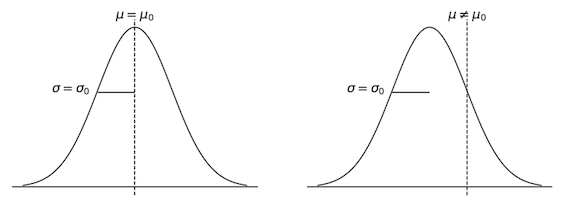

- If the null hypothesis is true ("under the null hypothesis"), our random variable $X$ for students' grades is normally distributed as follows:
<br><br>
$$ X \sim \mathcal{N}(\mu_0,\,\sigma^2)$$
<br>
- So under the null the sample mean is normally distributed as follows:
$$\overline{X} \sim \mathcal{N}(\mu_0,\,\frac{\sigma^2}{n})$$
<br>
- Now comes the trick. What we can do is convert the sample mean $\overline{X}$ into a standard score, i.e. a test statistic, which has the following formula:
$$z_{\overline{X}} = \frac{\overline{X}-\mu_0}{\sigma/\sqrt{n}}$$
<br>
- This z-score, our test statistic, follows a standard normal distribution:
$$ z_{\overline{X}} \sim \mathcal{N}(0,\,1)$$
<br>
- Regardless of what the population parameters for the raw scores actually are, the 5% critical regions for z-test are always the same:

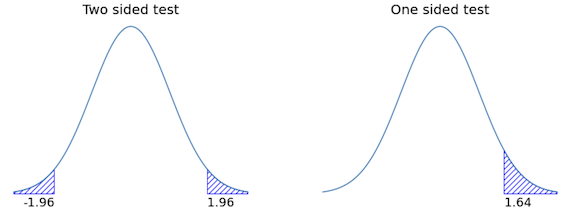

- OK let's now do this with Python, on a database on students' grades:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

In [ ]:
grades = df['grades']
sample_mean = st.mean(grades)
sample_mean

sd_true = 9.5
mu_null = 67.5

N = len(grades)

sem_true = sd_true / np.sqrt(N)

z_score = (sample_mean - mu_null) / sem_true
z_score

- We can see that 2.26 is bigger than the critical value of 1.96 that would be required to be significant at $\alpha=0.5$, but smaller than the value of 2.58 that would be required to be significant at a level of $\alpha=0.1$.
- Back in the day, the tables of critical values were huge, and so you could look up your actual z-value, and find the smallest value of $\alpha$ for which your data would be significant (which, as discussed earlier, is the very definition of a p-value). Let's use Python to do this.
- Notice that the $\alpha$ level of a $z$-test (or any other test, for that matter) defines the total area "under the curve" for the critical region, right? That is, if we set $\alpha = .05$ for a two-sided test, then the critical region is set up such that the area under the curve for the critical region is $.05$. And, for the $z$-test, the critical value of 1.96 is chosen that way because the area in the lower tail (i.e., below $-1.96$) is exactly $.025$ and the area under the upper tail (i.e., above $1.96$) is exactly $.025$. So, since our observed $z$-statistic is $2.26$, why not calculate the area under the curve below $-2.26$ or above $2.26$? In Python we can calculate this using the `NormalDist().cdf()` method. For the lower tail:

In [ ]:
lower_area = st.NormalDist().cdf(-z_score)
lower_area

- Since the normal distribution is symmetrical, the upper area under the curve is identical to the lower area, and we can simply add them together to find our exact p-value:

In [ ]:
lower_area = st.NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

- Another way of doing the same thing is computing the 95% confidence interval , and checking if the interval contains 67.5 (homework)
- We can do the same with $\mu_0=0$ (homework)

### The one-sample t-test (unknown mean and variance)
- If we do not know the variance, our test statistic will be as follows:
$$z_{\overline{X}} = \frac{\overline{X}-\mu_0}{\overline{S}/\sqrt{n}}$$
<br>
- if this estimate has been constructed from $N$ observations, then the sampling distribution turns into a $t$-distribution with $N-1$ **_degrees of freedom_** (df). The $t$ distribution is very similar to the normal distribution, but has "heavier" tails.
- Let's re-do it in Python:

In [ ]:
degrees_freedom = len(grades)-1
sample_mean = st.mean(grades)
deviations = (grades - sample_mean)
deviations2 = np.square(deviations)

S2 = np.sum(deviations2)/degrees_freedom
S = np.sqrt(S2)

sem_true = S / np.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score

In [ ]:
lower_area = stats.t.cdf(-z_score, df = degrees_freedom)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

In [ ]:
# check
t, p = stats.ttest_1samp(a = grades, popmean = mu_null)
t, p